In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
#print(os.listdir("../input/"))
data = pd.read_csv("../input/train_data.csv",header = None)
df= pd.DataFrame(data)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns = ['age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income']

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#Converting Categorical variables into Quantitative variables
print(set(data['occupation']))
data['occupation'] = data['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)


{' Armed-Forces', ' Transport-moving', ' Protective-serv', ' Sales', ' Other-service', ' Exec-managerial', ' Craft-repair', ' Farming-fishing', ' Prof-specialty', ' Machine-op-inspct', ' ?', ' Adm-clerical', ' Handlers-cleaners', ' Priv-house-serv', ' Tech-support'}


In [6]:
print(set(data['income']))
data['income'] = data['income'].map({' <=50K': 0, ' >50K': 1}).astype(int)

{' >50K', ' <=50K'}


In [7]:
data['sex'] = data['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [8]:
data['race'] = data['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)

In [9]:
data['marital.status'] = data['marital.status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [10]:
df.occupation.replace(0, np.nan, inplace=True)

In [11]:
print(df.shape)
df=df.dropna()
print(df.shape)

(32561, 15)
(30718, 15)


In [12]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,5,3.0,Not-in-family,3,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,2,7.0,Husband,3,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,4,4.0,Not-in-family,3,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,2,4.0,Husband,0,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,2,5.0,Wife,0,1,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,2,7.0,Wife,3,1,0,0,40,United-States,0
6,49,Private,160187,9th,5,0,13.0,Not-in-family,0,1,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,2,7.0,Husband,3,0,0,0,45,United-States,1
8,31,Private,45781,Masters,14,5,5.0,Not-in-family,3,1,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,2,7.0,Husband,3,0,5178,0,40,United-States,1


                     age    fnlwgt    ...     hours.per.week    income
age             1.000000 -0.076540    ...           0.101879  0.242431
fnlwgt         -0.076540  1.000000    ...          -0.022810 -0.009446
education.num   0.043567 -0.043509    ...           0.151241  0.334640
marital.status -0.475110  0.034332    ...          -0.186928 -0.369218
occupation     -0.028550  0.009604    ...          -0.046862 -0.052940
race            0.019538 -0.098781    ...           0.056031  0.079117
sex            -0.082117 -0.026569    ...          -0.230321 -0.216626
capital.gain    0.080392 -0.000189    ...           0.079548  0.221871
capital.loss    0.060409 -0.010011    ...           0.053961  0.151461
hours.per.week  0.101879 -0.022810    ...           1.000000  0.228547
income          0.242431 -0.009446    ...           0.228547  1.000000

[11 rows x 11 columns]


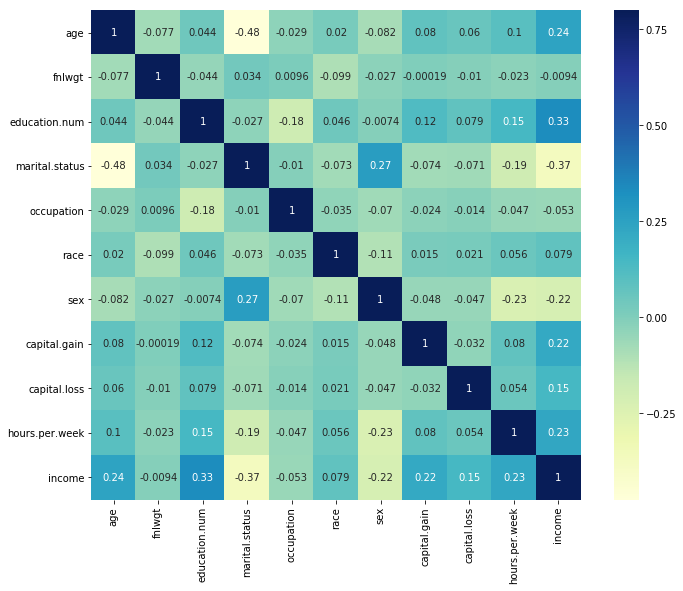

In [13]:
hmap = df.corr()
print(hmap)
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="YlGnBu", square=True);

In [14]:
#Feature selection and applying random forest has to be proceeded